In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

In [2]:
dataset = pd.read_csv('../input/indian_liver_patient.csv')
dataset.shape

(583, 11)

In [ ]:
dataset.head()

In [ ]:
dataset.info()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.describe().transpose()

In [ ]:
dataset['Dataset'].value_counts()

---
### Preprocessing

In [3]:
# Categorical Fix
dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [4]:
# Fill NA
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].mean())

In [5]:
# Normalize
dataset =(dataset - dataset.mean())/dataset.std()

---
### Selecting Features

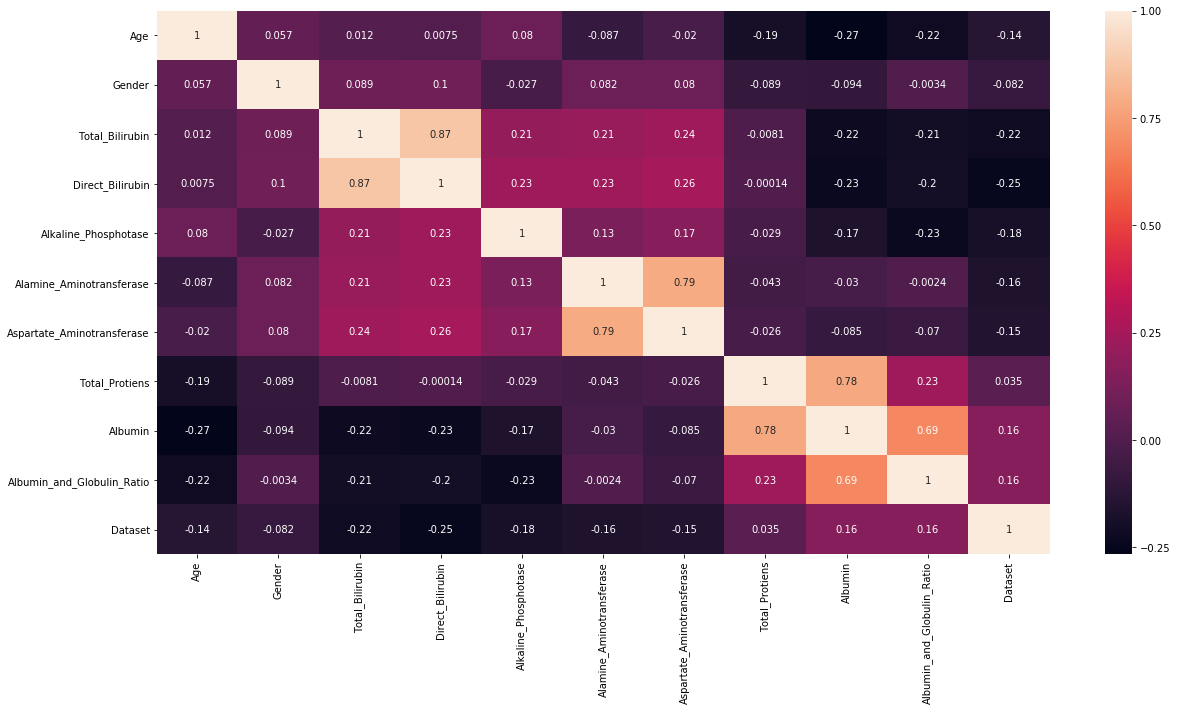

In [6]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), annot=True)

In [7]:
dataset_features = ['Age', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase', 'Gender', 'Total_Bilirubin', 'Dataset']
dataset = dataset[dataset_features]
dataset.shape

(583, 8)

---
### Training Model

In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('Dataset')
test_labels = test_dataset.pop('Dataset')

In [9]:
train_dataset.shape, train_labels.shape, test_dataset.shape, test_labels.shape

((466, 7), (466,), (117, 7), (117,))

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(14, kernel_initializer = 'uniform', activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, kernel_initializer = 'uniform', activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax')
#     tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
#     optimizer='rmsprop',
#     loss='binary_crossentropy',
#     metrics=['accuracy', 'mean_absolute_error', 'mean_squared_error'],
    metrics=['accuracy'],
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_72 (Dense)             (None, 14)                112       
_________________________________________________________________
dropout_10 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 258       
Total params: 2,346
Trainable params: 2,346
Non-trainable params: 0
_________________________________________________________________


In [98]:
EPOCHS = 50

history = model.fit(train_dataset, 
                    train_labels, 
                    epochs=EPOCHS,
#                     validation_split=0.1,
                    verbose=1 )

Epoch 1/50
466/466 [==============================] - 1s 1ms/sample - loss: 0.6755 - acc: 0.9657
Epoch 2/50
466/466 [==============================] - 0s 131us/sample - loss: 0.6248 - acc: 1.0000
Epoch 3/50
466/466 [==============================] - 0s 116us/sample - loss: 0.5854 - acc: 1.0000
Epoch 4/50
466/466 [==============================] - 0s 130us/sample - loss: 0.5756 - acc: 1.0000
Epoch 5/50
466/466 [==============================] - 0s 138us/sample - loss: 0.5638 - acc: 1.0000
Epoch 6/50
466/466 [==============================] - 0s 133us/sample - loss: 0.5530 - acc: 1.0000
Epoch 7/50
466/466 [==============================] - 0s 120us/sample - loss: 0.5485 - acc: 1.0000
Epoch 8/50
466/466 [==============================] - 0s 119us/sample - loss: 0.5415 - acc: 1.0000
Epoch 9/50
466/466 [==============================] - 0s 135us/sample - loss: 0.5378 - acc: 1.0000
Epoch 10/50
466/466 [==============================] - 0s 125us/sample - loss: 0.5331 - acc: 1.0000
Epoch 11/50

In [100]:
# acc, loss, mae, mse
model.evaluate(test_dataset, test_labels, verbose=1)

117/117 [==============================] - 0s 2ms/sample - loss: 0.6583 - acc: 1.0000


[0.6582960073764508, 1.0]

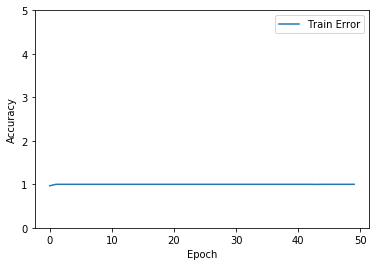

In [99]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['acc'],
       label='Train Error')
# plt.plot(hist['epoch'], hist['val_acc'],
#        label = 'Val Error')
plt.ylim([0,5])
plt.legend()

# plt.figure()
# plt.xlabel('Epoch')
# plt.ylabel('Mean Abs Error [MPG]')
# plt.plot(hist['epoch'], hist['mean_absolute_error'],
#        label='Train Error')
# plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#        label = 'Val Error')
# plt.ylim([0,5])
# plt.legend()

# plt.figure()
# plt.xlabel('Epoch')
# plt.ylabel('Mean Square Error [$MPG^2$]')
# plt.plot(hist['epoch'], hist['mean_squared_error'],
#        label='Train Error')
# plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#        label = 'Val Error')
# plt.ylim([0,20])
# plt.legend()
# plt.show()



---

In [ ]:
model.predict(test_dataset)